In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

example taken from R. Johansson book Numerical Python. Scalar non-lineal function
$$ f(x,\beta) = \beta_0 + \beta_1 \exp (\beta_2x^2) $$

In [2]:
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1*np.exp(-b2 * x**2)

In [3]:
xdata = np.linspace(0, 5, 50)
y = f(xdata, *beta)
ydata = y + 0.05 * np.random.randn(len(xdata))

In [4]:
def g(beta):
    return ydata - f(xdata, *beta)

In [15]:
beta

(0.25, 0.75, 0.5)

# Using the minimize.leastsq

In [5]:
beta_start = (1, 1, 1)
beta_opt, beta_cov = optimize.leastsq(g, beta_start)

In [6]:
beta_opt

array([0.22574763, 0.72997459, 0.44174449])

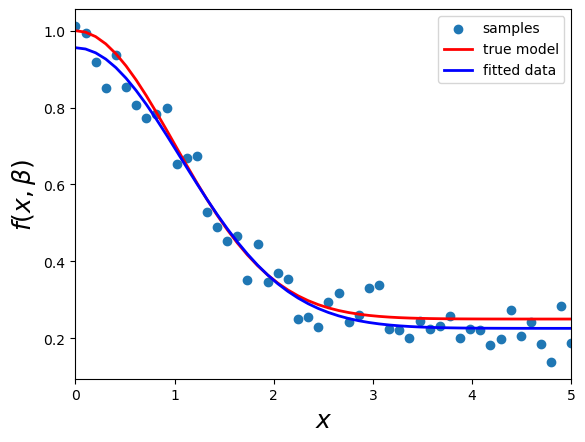

In [7]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='samples')
ax.plot(xdata, y, 'r', lw=2, label='true model')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='fitted data')
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
ax.legend()

In [8]:
g(beta_opt)

array([ 0.05663379,  0.04283889, -0.0247245 , -0.07628062,  0.03354022,
       -0.02317136, -0.0365457 , -0.03675814,  0.01283675,  0.07019976,
       -0.03305862,  0.02418384,  0.07259791, -0.03357612, -0.03194212,
       -0.03254548,  0.01576415, -0.06797499,  0.05525942, -0.01858559,
        0.02857936,  0.03181117, -0.05450208, -0.034051  , -0.04758062,
        0.02628255,  0.06017864, -0.00966632,  0.01491544,  0.08872769,
        0.10009262, -0.01032717, -0.01023012, -0.03117197,  0.0158636 ,
       -0.00441276,  0.00301077,  0.03035887, -0.02606027, -0.00194201,
       -0.00571578, -0.04387734, -0.02722065,  0.04819563, -0.01875158,
        0.01644998, -0.04093771, -0.08731006,  0.05831403, -0.03771439])

# Using the minimize.curve_fit
Wrapper around optimize.leastsq that avoids the need to define the objective function `g(beta)`

In [9]:
beta_opt, beta_cov = optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.22574763, 0.72997459, 0.44174449])

# Our problem

In [10]:
from scipy.spatial.transform import Rotation as r

In [11]:
def sph2cart(phi, theta, T):
    """ TODO
    """
    
    x = T * np.sin(phi) * np.cos(theta)
    y = T * np.sin(phi) * np.sin(theta)
    z = T * np.cos(phi)
    
    return x, y, z
    

def generate_T_mesh(density=50):
    """ TODO
    """
    
    # generate the mesh
    phi, theta = np.meshgrid(np.linspace(0, np.pi, density), \
                             np.linspace(0, 2*np.pi, density))
    
    # set olivine Ta, Tb, and Tc values
    Ta, Tb, Tc = 90, 50, 20
    
    # estimate T values
    T = Ta * np.cos(theta)**2 * np.sin(phi)**2 + \
        Tb * np.sin(theta)**2 * np.sin(phi)**2 + \
        Tc * np.cos(phi)**2;
    
    # # Express the mesh in the cartesian coordinates
    x, y, z = sph2cart(phi, theta, T)
    
    return np.dstack((x,y,z))

def func(T, x):
    """ Comment...TODO
    """
    
    # generate the rotation in euler space (Bunge convention)
    rotation = r.from_euler('zxz', [x[0], x[1], x[2]], degrees=True)
    
    return T @ rotation.as_matrix().T

In [12]:
T = generate_T_mesh(20)
T_obs = func(T, x=(0, 45, 0)) + 0.05 * np.random.randn()

In [13]:
def g(x):
    return T_obs - func(T, x)

In [14]:
x0 = (0, 0, 0)
optimize.leastsq(g, x0)

ValueError: object too deep for desired array

error: Result from function call is not a proper array of floats.

In [ ]:
x = (0, 45, 0)
g(x)

array([[[0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252],
        ...,
        [0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252]],

       [[0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252],
        ...,
        [0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252]],

       [[0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252],
        ...,
        [0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252]],

       ...,

       [[0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0.10033252, 0.10033252],
        [0.10033252, 0